<a href="https://colab.research.google.com/github/hakanunal88/hakan.github.io/blob/main/Assignment_4_Seaborn_PoliceKillingUS_is_due.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH SEABORN

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [ ]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [ ]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [ ]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
df["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

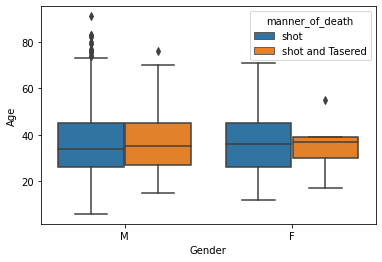

In [ ]:
# with seaborn
sns.boxplot(x="gender", y="age", hue = "manner_of_death", data=df)
plt.xlabel("Gender")
plt.ylabel("Age");

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

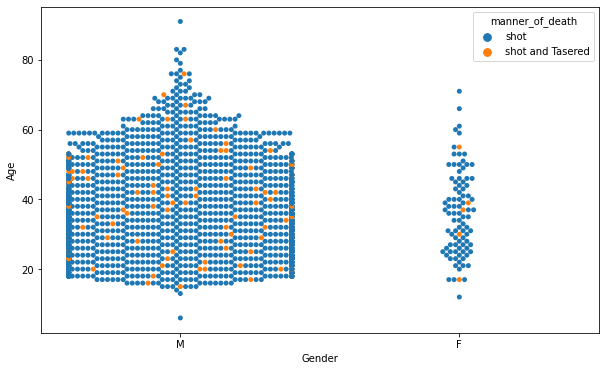

In [ ]:
# with seaborn
plt.figure(figsize=(10,6))
sns.swarmplot (x='gender', y='age', hue='manner_of_death', data=df)
plt.xlabel("Gender")
plt.ylabel("Age");

## 2: Plot 12 most dangerous cities

In [ ]:
cities_freq = df["city"].value_counts().head(12) #veya [:12]
cities_freq

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Tucson          13
Name: city, dtype: int64

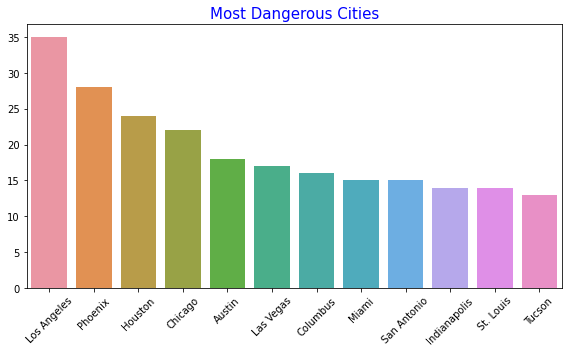

In [ ]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=cities_freq.index, y=cities_freq.values)
ax.set_xticklabels(cities_freq.index, rotation = 45)
ax.set_title('Most Dangerous Cities', color = 'blue', fontsize=15)
plt.tight_layout();

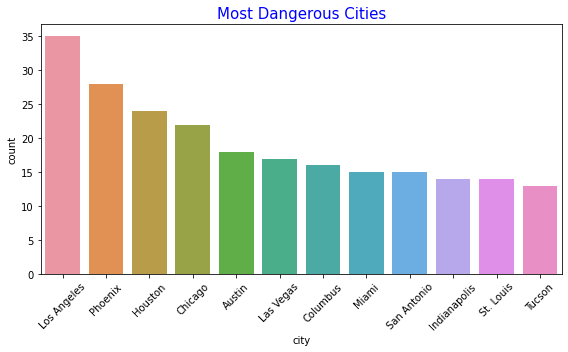

In [ ]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="city", data=df, order=cities_freq.index)
ax.set_xticklabels(cities_freq.index, rotation = 45)
ax.set_title('Most Dangerous Cities',color = 'blue',fontsize=15)
plt.tight_layout();

## 3: Plot 20 most dangerous states

In [ ]:
dangerous_states = df["state"].value_counts().head(20) #[:20]
dangerous_states

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
SC     41
Name: state, dtype: int64

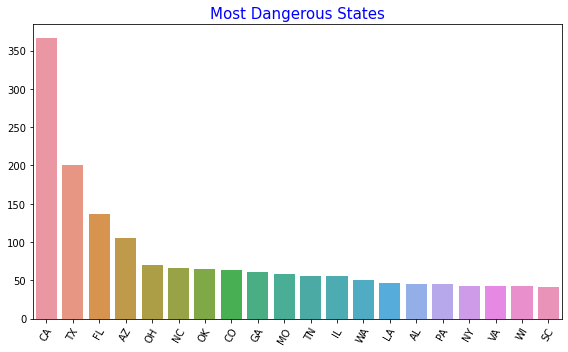

In [ ]:
# with seaborn barplot
plt.figure(figsize=(8,5))
sns.barplot(x = dangerous_states.index, y = dangerous_states.values)
plt.xticks(rotation=60)
plt.title("Most Dangerous States", color = "blue", fontsize=15)
plt.tight_layout()

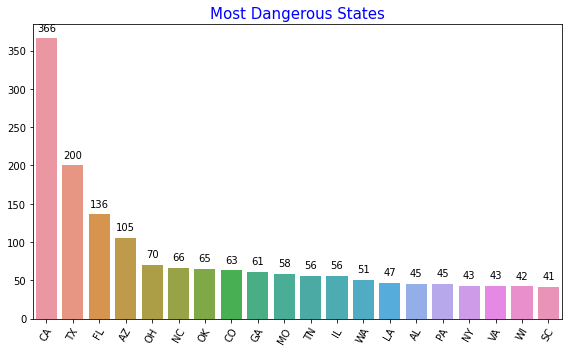

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x = dangerous_states.index, y = dangerous_states.values)
plt.xticks(rotation=60)
plt.title('Most Dangerous States',color = 'blue',fontsize=15)
plt.tight_layout()
for index,value in enumerate(df['state'].value_counts().head(20)):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center')

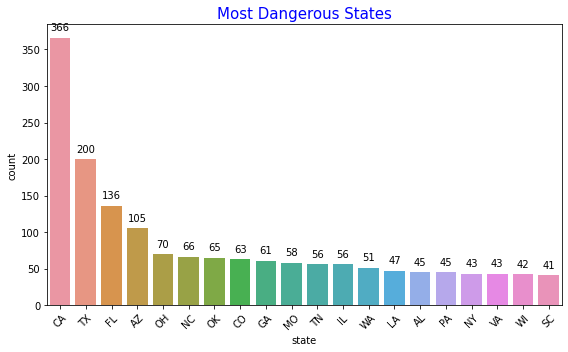

In [ ]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="state", data=df, order=dangerous_states.index)
ax.set_xticklabels(dangerous_states.index, rotation = 45)
ax.set_title('Most Dangerous States',color = 'blue',fontsize=15)
plt.tight_layout()
for index,value in enumerate(df['state'].value_counts().head(20)):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

## 4: Plot Having mental ilness or not for killed people

In [ ]:
df["signs_of_mental_illness"].value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

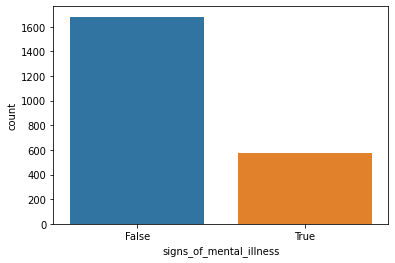

In [ ]:
# with seaborn
sns.countplot(x = df["signs_of_mental_illness"]);

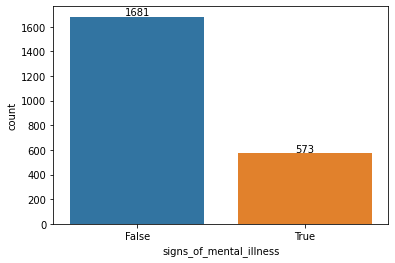

In [ ]:
sns.countplot(x = df["signs_of_mental_illness"]);
for index,value in enumerate(df["signs_of_mental_illness"].value_counts()):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

## 5: Plot number of Threat Types

In [ ]:
df['threat_level'].value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

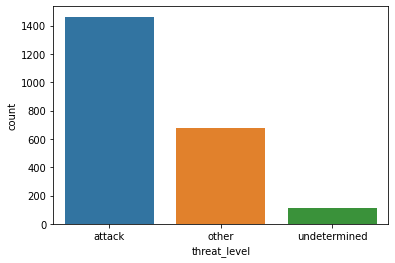

In [ ]:
# with seaborn
sns.countplot(x=df['threat_level']);

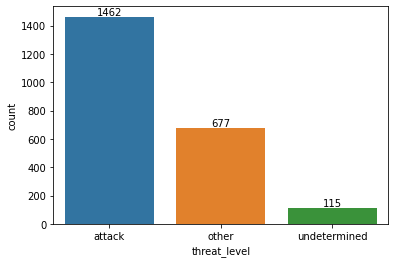

In [ ]:
sns.countplot(x=df['threat_level'])
for index,value in enumerate(df['threat_level'].value_counts()):
  plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

## 6: Plot number of Flee Types

In [ ]:
df["flee"].value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

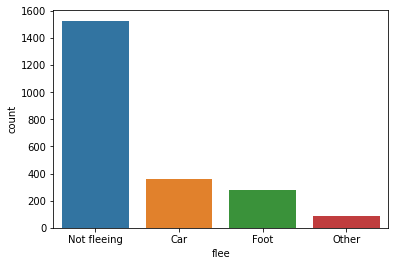

In [ ]:
# with seaborn
sns.countplot(x=df["flee"]);

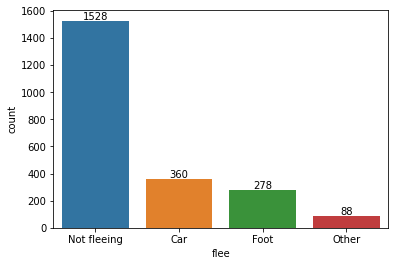

In [ ]:
sns.countplot(x=df["flee"])
for index,value in enumerate(df["flee"].value_counts()):
  plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment="center");